**Module import**

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

# Results

In [2]:
hipc_df = pd.read_csv("./Data/hipc_df.csv")
N = len(hipc_df)
labels = hipc_df['Label'].to_numpy()
patient_labels =  hipc_df['Patient'].to_numpy()
labs_labels = hipc_df["Lab"].to_numpy()

# Comparing silhouette scores

In [3]:
for K in [16,32,64,128,256, 512] :
    lin_bary = np.load("./Results/linW2/linW2_W2bary_Kmeans_K"+str(K)+".npy")
    lin_unif = np.load("./Results/linW2/linW2_unif_Kmeans_K"+str(K)+".npy")
    lin_L2mean = np.load("./Results/linW2/linW2_L2mean_Kmeans_K"+str(K)+".npy")
    print("For K = ",K, " for W2 barycenter : ", 
          np.round(silhouette_score(lin_bary, patient_labels),2),
          " for L2 mean of weights : ",
          np.round(silhouette_score(lin_L2mean, patient_labels),2),
           " and for uniform weights : ",
           np.round(silhouette_score(lin_unif, patient_labels),2))

For K =  16  for W2 barycenter :  0.51  for L2 mean of weights :  0.44  and for uniform weights :  0.47
For K =  32  for W2 barycenter :  0.42  for L2 mean of weights :  0.39  and for uniform weights :  0.4
For K =  64  for W2 barycenter :  0.35  for L2 mean of weights :  0.32  and for uniform weights :  0.33
For K =  128  for W2 barycenter :  0.31  for L2 mean of weights :  0.29  and for uniform weights :  0.3
For K =  256  for W2 barycenter :  0.28  for L2 mean of weights :  0.27  and for uniform weights :  0.27
For K =  512  for W2 barycenter :  0.27  for L2 mean of weights :  0.25  and for uniform weights :  0.26


In [4]:
labs = ["W2", "D54", "FTV", "IU", "O0", "pw", "pM"]
markers = ['.', '^', '<', 's', '*', 'P', 'd']

patient1 = mpatches.Patch(color='blue', label='Patient 1')
patient2 = mpatches.Patch(color='red', label='Patient 2')
patient3 = mpatches.Patch(color='green', label='Patient 3')
handles = [patient1, patient2, patient3]
for i in range(len(markers)) :
    handles.append(Line2D([0], [0], label=labs[i], marker=markers[i], markersize=10,  linestyle=''))

colors_dict={"1" : 'blue',
"2" : 'red', 
"3" : 'green'}

markers_dict = dict(zip(labs, markers))

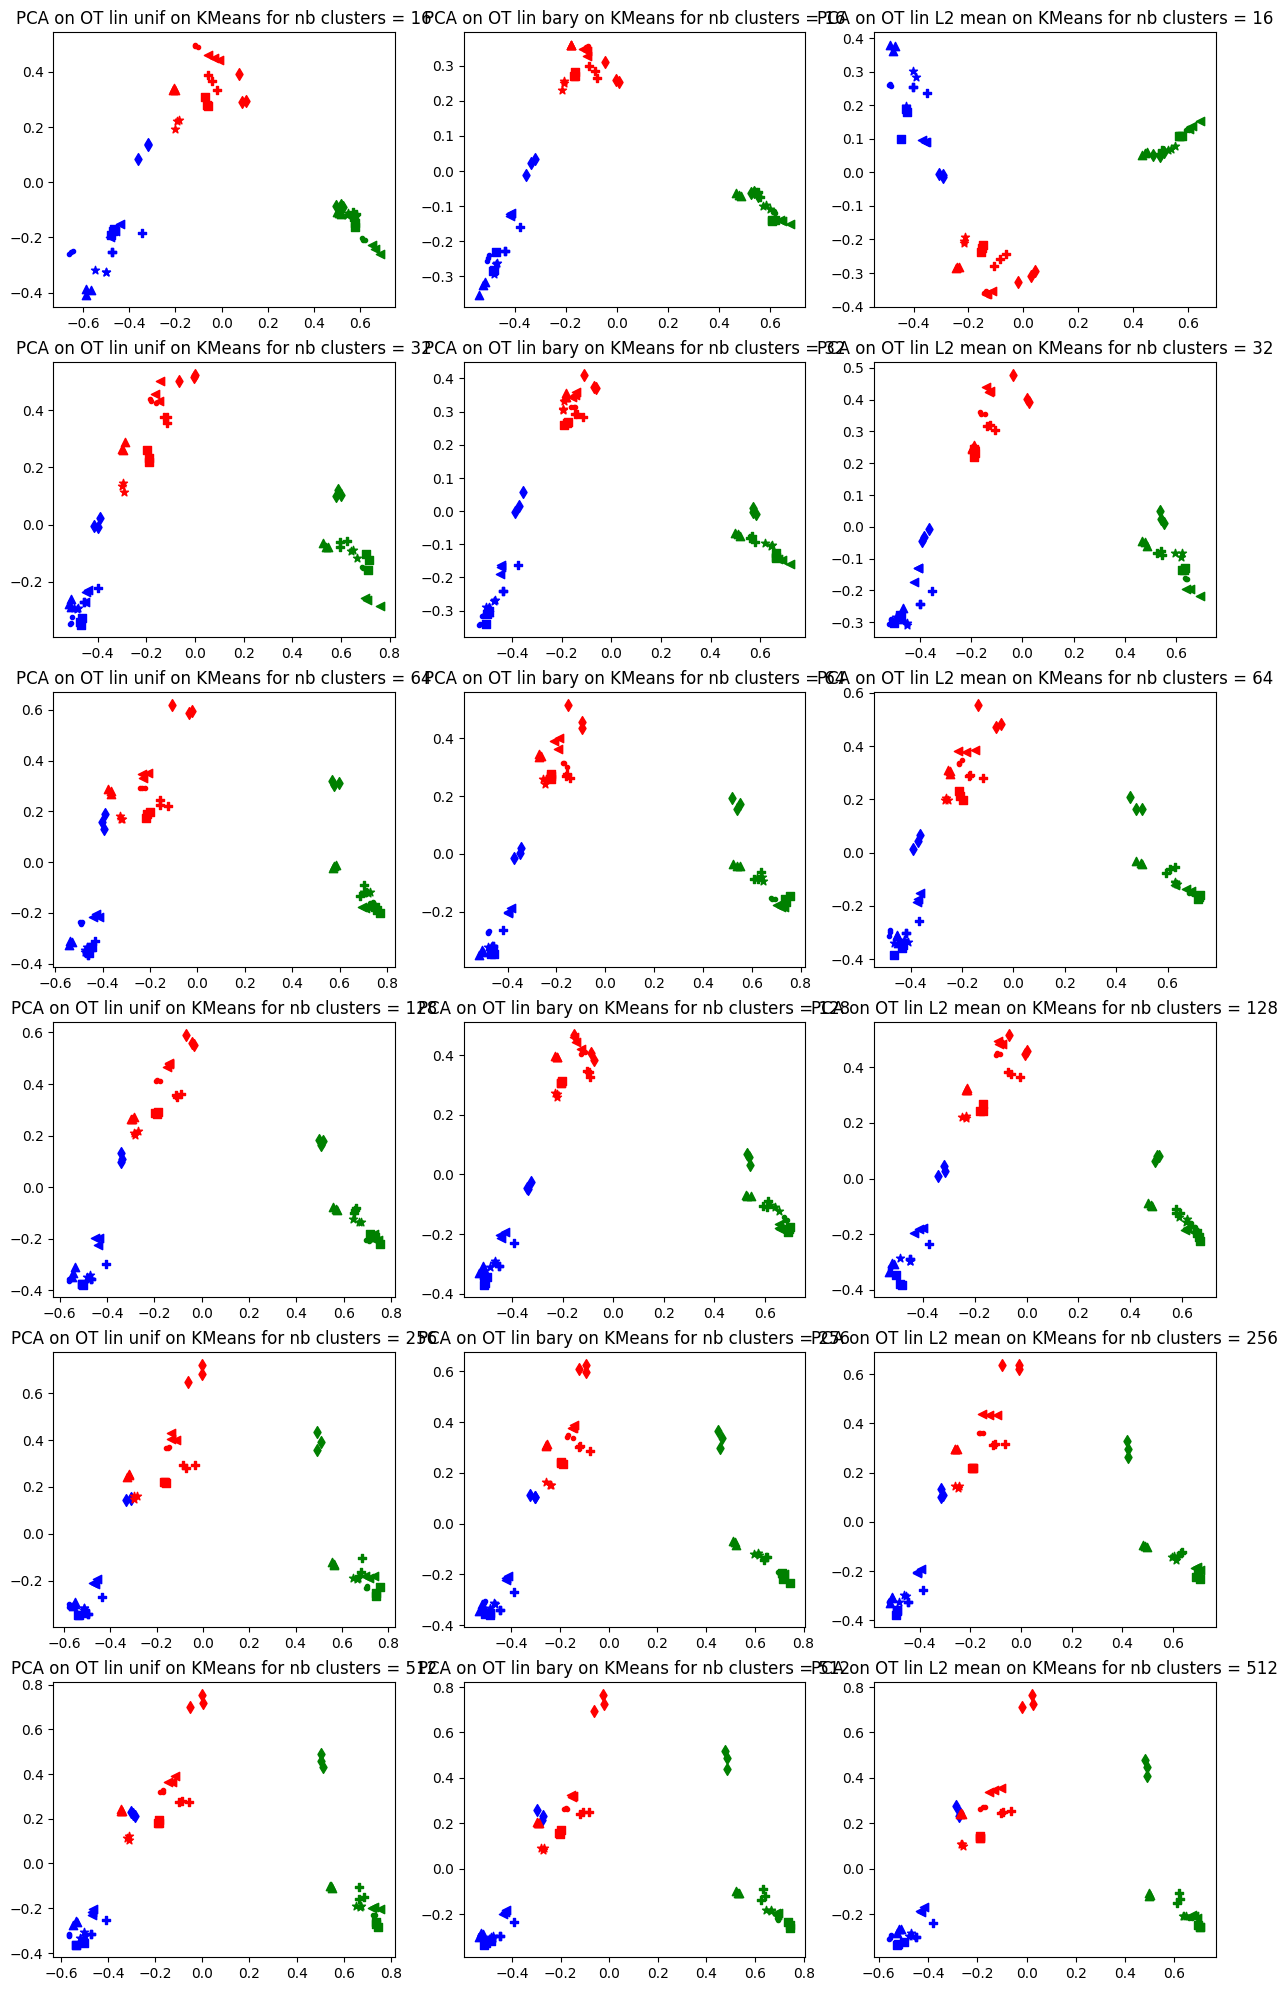

In [5]:
fig, ax = plt.subplots(figsize=(15,25), nrows = 6, ncols = 3)

for k,K in enumerate([16,32,64,128,256, 512]) :
    pca_lin_unif = np.load("./Results/PCA/pca_linW2_unif_Kmeans_K"+str(K)+".npy")
    pca_lin_bary = np.load("./Results/PCA/pca_linW2_W2bary_Kmeans_K"+str(K)+".npy")
    pca_lin_L2mean = np.load("./Results/PCA/pca_linW2_L2mean_Kmeans_K"+str(K)+".npy")
    for i in range(N) :
        ax[k][0].scatter(pca_lin_unif[i,0], pca_lin_unif[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
        ax[k][1].scatter(pca_lin_bary[i,0], pca_lin_bary[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
        ax[k][2].scatter(pca_lin_L2mean[i,0], pca_lin_L2mean[i,1], c=colors_dict[str(patient_labels[i])], marker=markers_dict[str(labs_labels[i])])
       
    ax[k][0].set_title("PCA on OT lin unif on KMeans for nb clusters = "+str(K))
    ax[k][1].set_title("PCA on OT lin bary on KMeans for nb clusters = "+str(K))
    ax[k][2].set_title("PCA on OT lin L2 mean on KMeans for nb clusters = "+str(K))

#plt.savefig("./images/K"+str(64)+"_PCA_LOT_globalKMeans.png")